In [3]:
# importing useable libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# loading dataset and check the dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


D:\Installed Software\Anaconda 3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


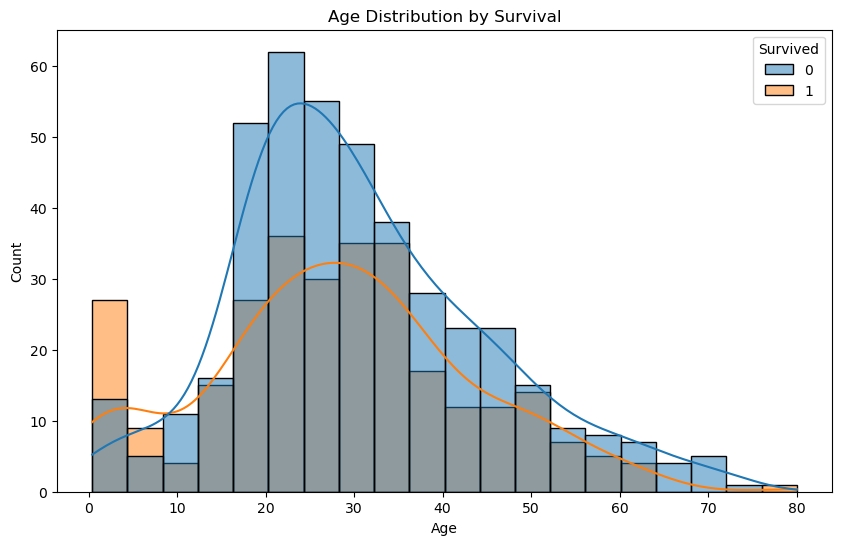

In [4]:
# Explore age distribution among survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\kalee\AppData\Local\Temp\ipykernel_10620\3114092997.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_counts = df.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)
C:\Users\kalee\AppData\Local\Temp\ipykernel_10620\3114092997.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df.groupby(pd.cut(df['Fare'], bins=5))['Survived'].mean()


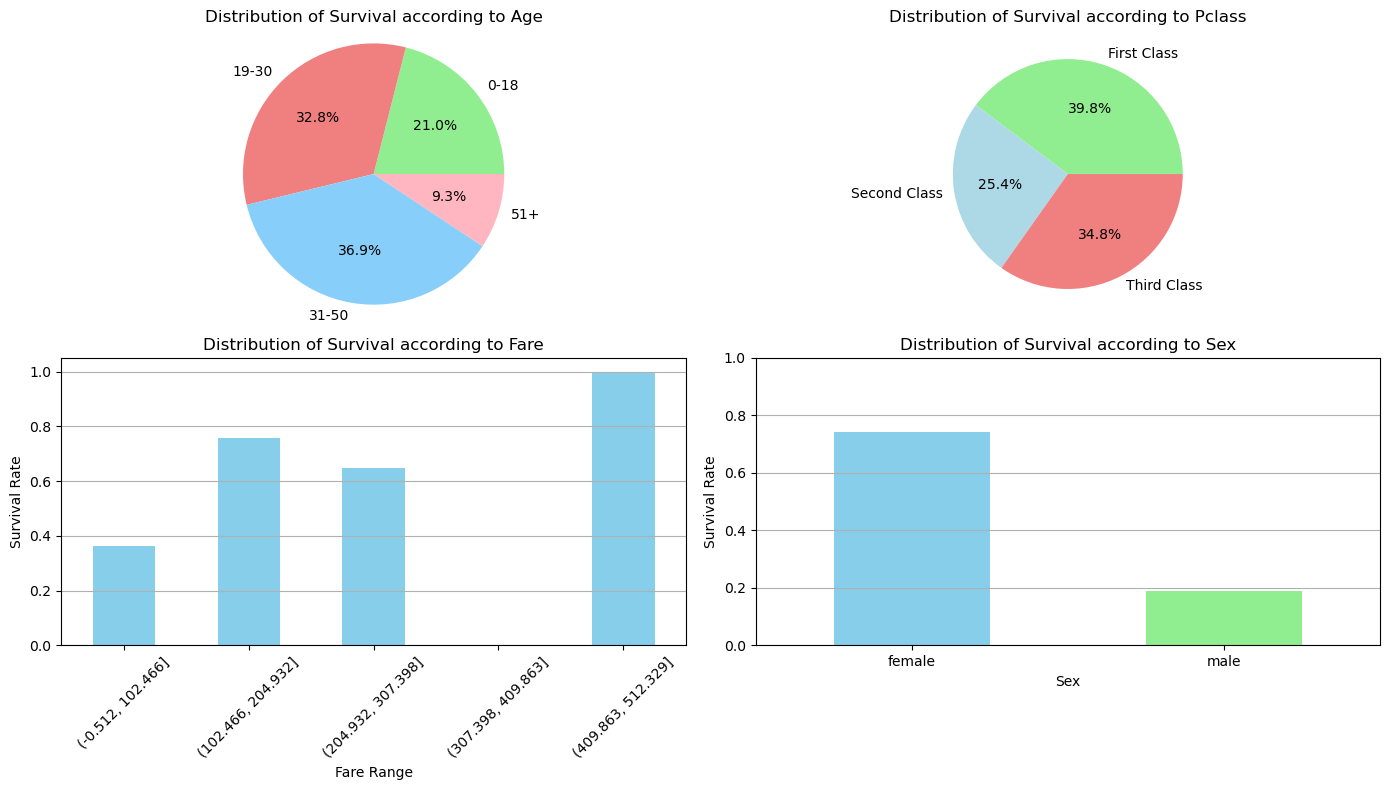

In [25]:
df = pd.DataFrame(df)

plt.figure(figsize=(14,8))

plt.subplot(2, 2, 1)
bins = [0, 18, 30, 50, 100]
labels = ['0-18', '19-30', '31-50', '51+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group the data by age group and survival status
survival_counts = df.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)
plt.pie(survival_counts[1], labels=survival_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Distribution of Survival according to Age')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle


plt.subplot(2, 2, 2)
# Group the data by Pclass and calculate the survival count
survival_count = df.groupby('Pclass')['Survived'].sum()
plt.pie(survival_count, labels=survival_count.index.map({1: 'First Class', 2: 'Second Class', 3: 'Third Class'}),
        autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Distribution of Survival according to Pclass')


plt.subplot(2, 2, 3)
# Group the data by fare and calculate the survival rate
survival_rate = df.groupby(pd.cut(df['Fare'], bins=5))['Survived'].mean()
survival_rate.plot(kind='bar', color='skyblue')
plt.xlabel('Fare Range')
plt.ylabel('Survival Rate')
plt.title('Distribution of Survival according to Fare')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.subplot(2, 2, 4)
# Group the data by sex and calculate the survival rate
survival_rate = df.groupby('Sex')['Survived'].mean()
survival_rate.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Distribution of Survival according to Sex')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [5]:
# Preprocessing: Drop irrelevant columns and handle missing values
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1,inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Convert 'Survived' column to integer type (just in case)
df['Survived'] = df['Survived'].astype(int)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [6]:
# splitng dataset for taining model and predict the target variable
X = df.drop(['Survived'],axis = 1)
df['Survived'] = df['Survived'].astype(int)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [11]:
# fiting model on data and predicting the target variable
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy *100:.2f}')

Accuracy: 79.80


D:\Installed Software\Anaconda 3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Import necessary libraries for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# fiting model on data and predicting the target variable
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

Accuracy: 65.50


In [14]:
# Import necessary libraries for DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

# fiting model on data and predicting the target variable
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

Accuracy: 73.49


In [15]:
# Import necessary libraries for Support Vector Machines
from sklearn.svm import SVC, LinearSVC

# fiting model on data and predicting the target variable
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy * 100: .2f}')

Accuracy :  78.12
